# Preprocessing Data : 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("imdb.csv")

def convert_duration(duration):
    parts = duration.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.rstrip('h')) * 60
        elif 'm' in part:
            total_minutes += int(part.rstrip('m'))
    return total_minutes

df['Duration'] = df['Duration'].apply(convert_duration)

print(df['Duration'])


0       142
1       152
2       148
3       139
4       142
       ... 
4718     95
4719    115
4720    119
4721    139
4722    112
Name: Duration, Length: 4723, dtype: int64


In [3]:
df['Meta Score'] = df['Meta Score'].astype(int)

In [4]:
def convert_votes(votes_str):
    if 'K' in votes_str:
        return int(float(votes_str.rstrip('K')) * 1000)
    elif 'M' in votes_str:
        return int(float(votes_str.rstrip('M')) * 1000000)
    else:
        return int(votes_str)

df['Number of Votes'] = df['Number of Votes'].apply(convert_votes)

In [5]:
def convert_currency(value):
    if isinstance(value, str) and value.startswith('$'):
        return int(value.replace('$', '').replace(',', ''))
    else:
        return value

df['Budget'] = df['Budget'].apply(convert_currency)
df['Gross (worldwide)'] = df['Gross (worldwide)'].apply(convert_currency)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4723 non-null   object 
 1   Release Year       4723 non-null   int64  
 2   Age Restriction    4723 non-null   object 
 3   Duration           4723 non-null   int64  
 4   Genre              4723 non-null   object 
 5   Rating             4723 non-null   float64
 6   Number of Votes    4723 non-null   int64  
 7   Meta Score         4723 non-null   int32  
 8   Language           4723 non-null   object 
 9   Country of Origin  4723 non-null   object 
 10  Companies          4723 non-null   object 
 11  Budget             4723 non-null   object 
 12  Gross (worldwide)  4723 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 461.4+ KB


In [7]:
df.to_csv("preprocessed_imdb.csv", index=False)

# EDA : 

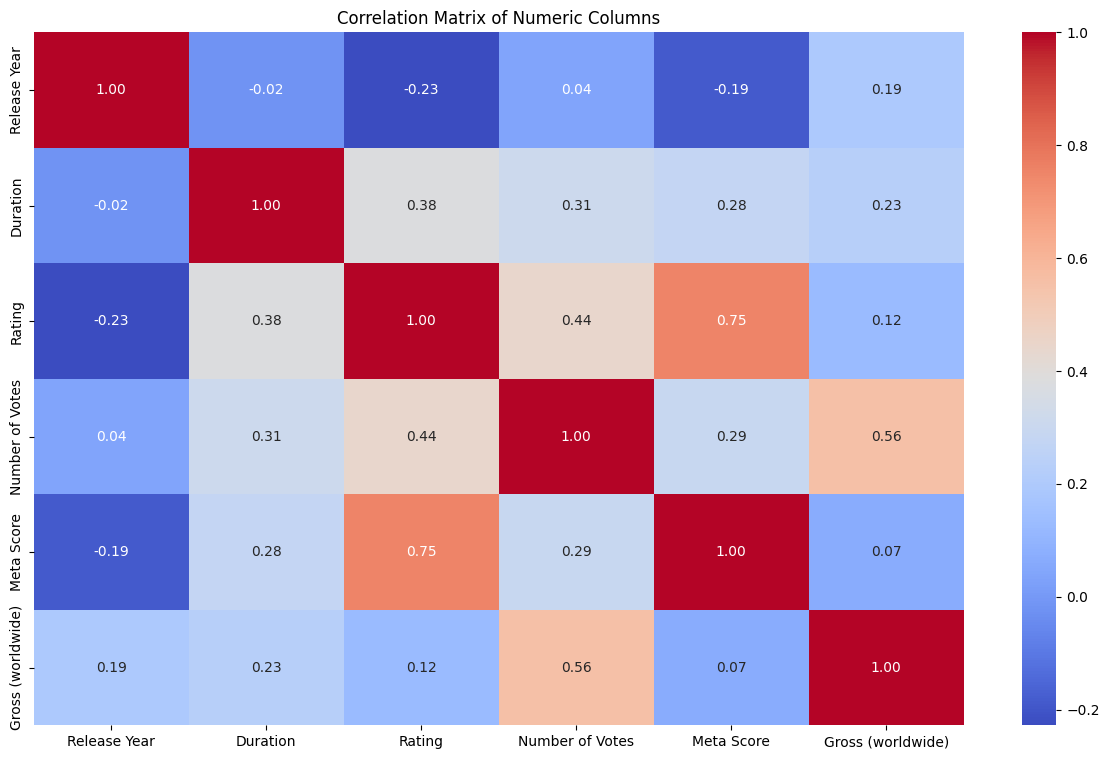

In [8]:
df = pd.read_csv("preprocessed_imdb.csv")

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

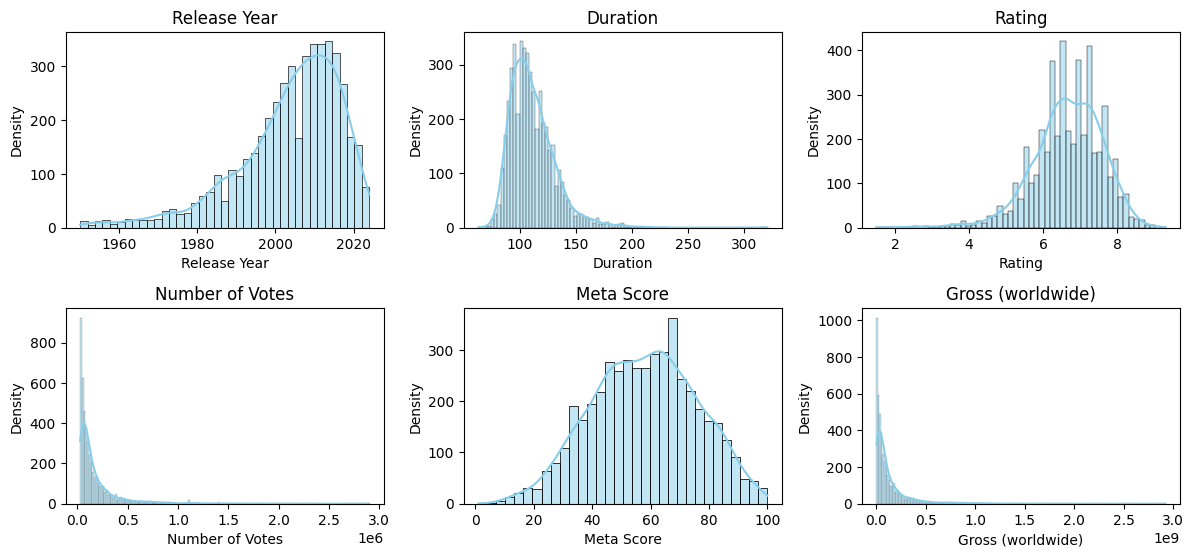

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

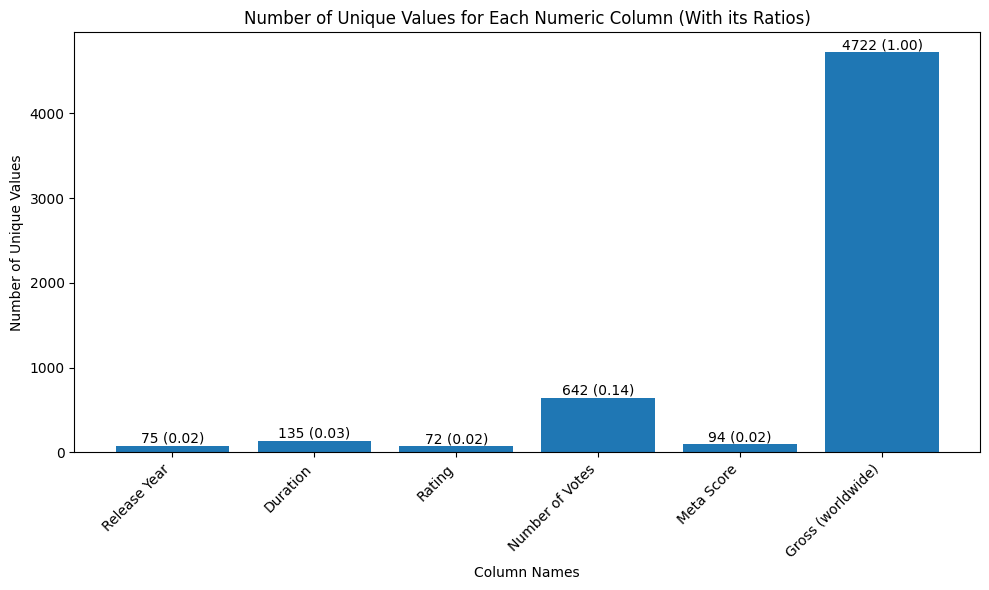

In [10]:
column_names = []
unique_value_counts = []
ratios = []

for column in numeric_columns.columns:
    column_names.append(column)
    unique_count = len(df[column].value_counts())
    unique_value_counts.append(unique_count)
    ratio = unique_count / len(df)
    ratios.append(ratio)

plt.figure(figsize=(10, 6))
bars = plt.bar(column_names, unique_value_counts)
plt.xlabel('Column Names')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for Each Numeric Column (With its Ratios)')
plt.xticks(rotation=45, ha='right')

for bar, count, ratio in zip(bars, unique_value_counts, ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count} ({ratio:.2f})', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Normalizing the data:

In [11]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.select_dtypes(include=['int', 'float'])
print(numeric_columns.head().columns)
df[numeric_columns.columns] =  MinMaxScaler().fit_transform(numeric_columns)

numeric_columns = df[numeric_columns.columns]

Index(['Release Year', 'Duration', 'Rating', 'Number of Votes', 'Meta Score',
       'Gross (worldwide)'],
      dtype='object')


<Figure size 1000x1000 with 0 Axes>

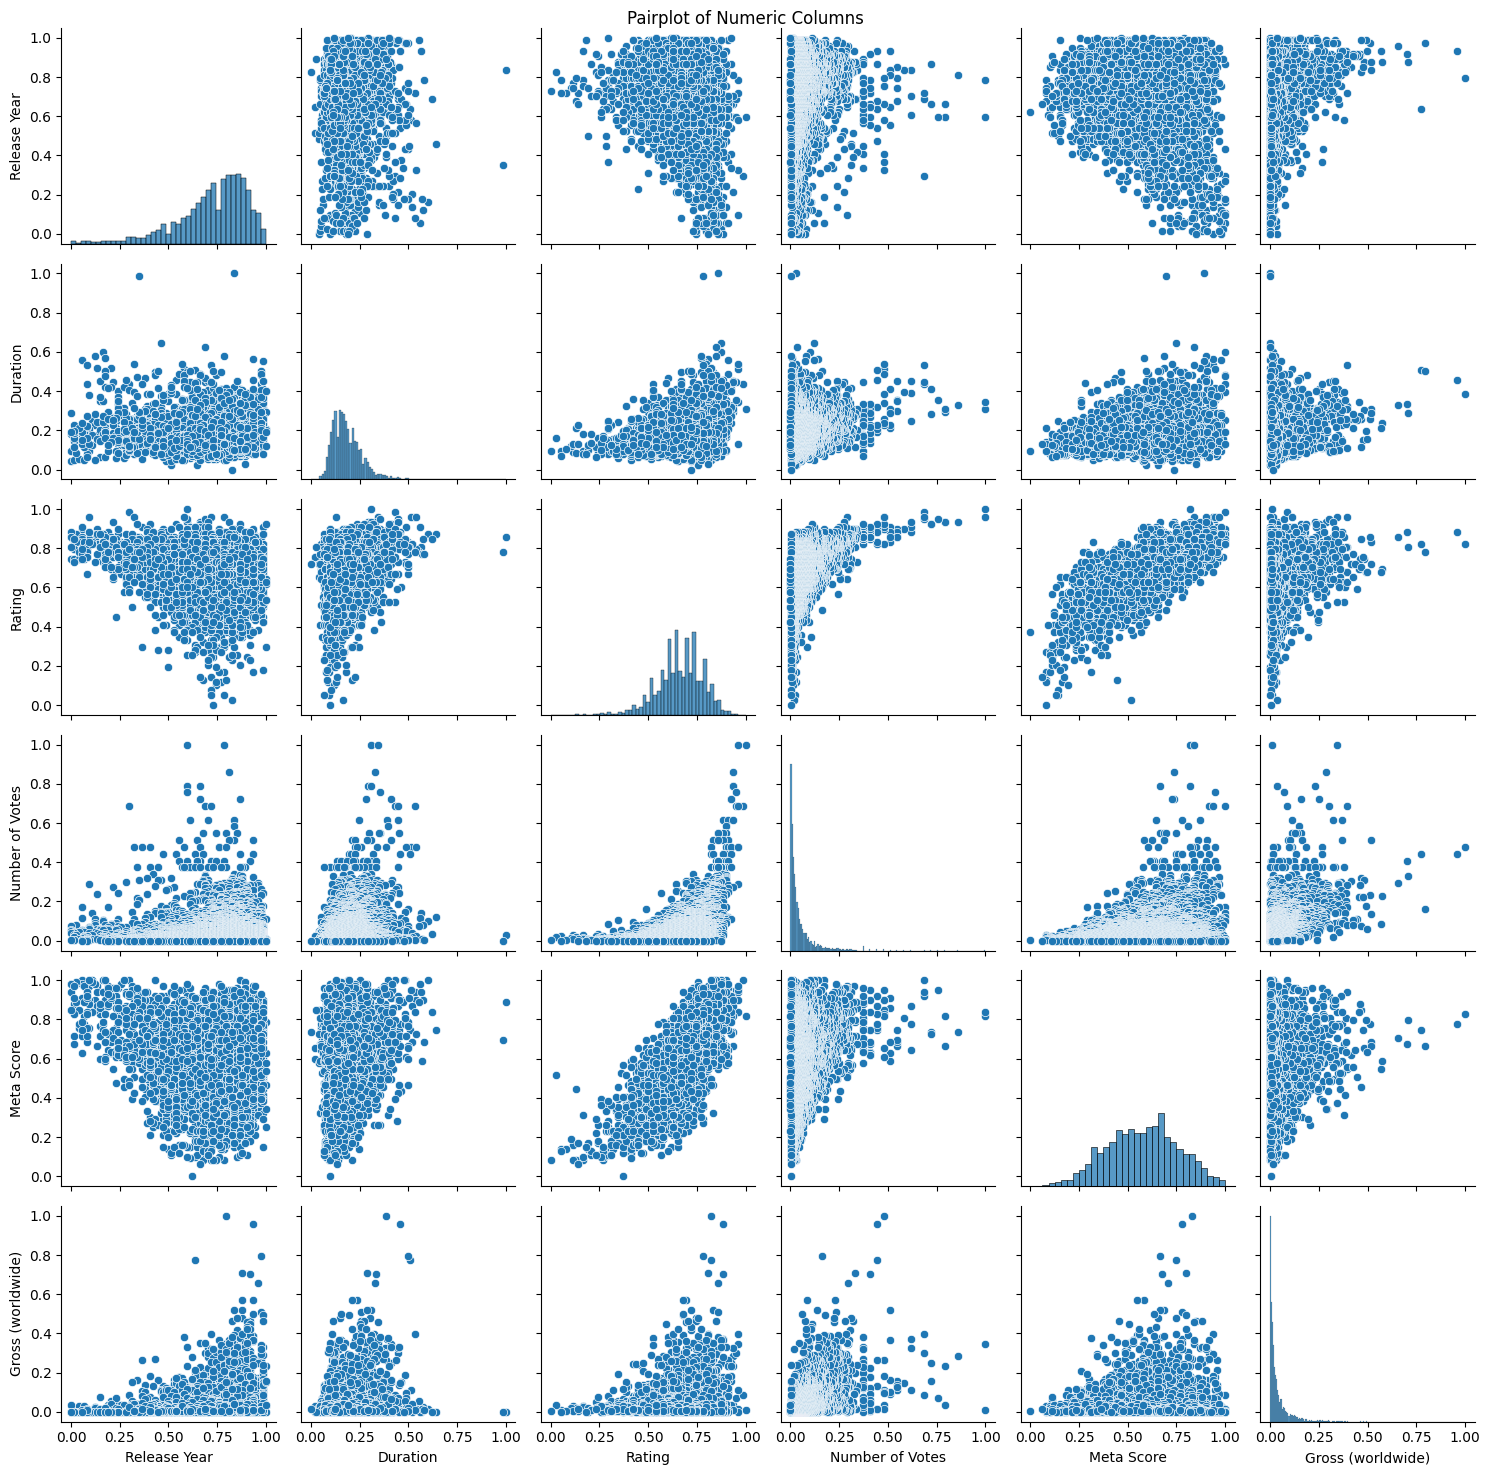

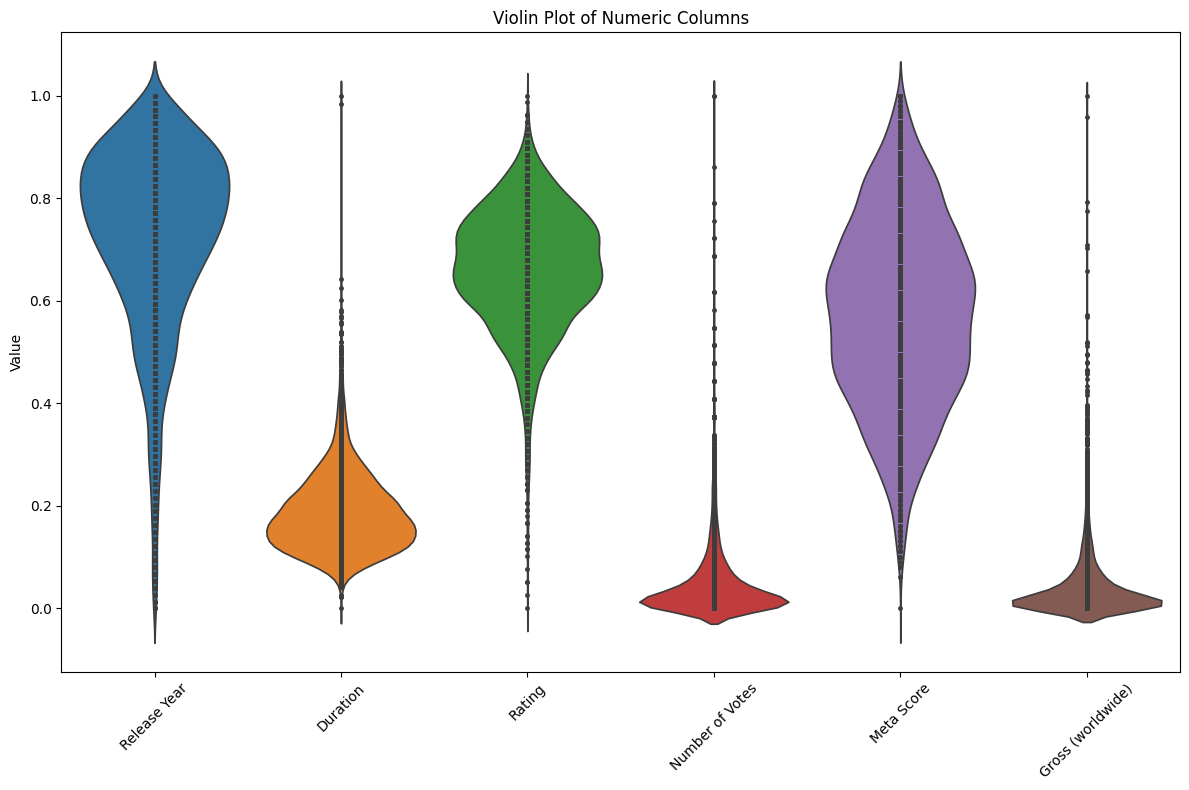

In [14]:
plt.figure(figsize=(10, 10))
sns.pairplot(data=numeric_columns)
plt.suptitle('Pairplot of Numeric Columns')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=numeric_columns, orient='v', inner='point')
plt.title('Violin Plot of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
